In [1]:
import interfere
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 200

### Intervention

In [2]:
# Build an intervention
start_interv_time = 30
slope = 0.1
inter_idx = 2
target_idx = 1
s = lambda t: (t - start_interv_time) * slope
g = interfere.SignalIntervention(inter_idx, s)


## Deterministic Model

In [68]:
model = interfere.dynamics.Liping3DQuadFinance(sigma=0.0)
x0 = 3 * np.random.rand(3) - 1.5
t = np.linspace(0, 30, 3000)
X = model.simulate(x0, t)

x_end = X[-1, :]
t_forecast = np.linspace(t[-1], 60, 3000)
X_do = model.simulate(x_end, t_forecast, g)

method = interfere.methods.SINDY()

X_noised = X + np.random.randn(*X.shape)
X_noised[-1, :] = X[-1, :]
X_do_pred = method.counterfactual_forecast(X, t, t_forecast, g)

X_do_pred = method.counterfactual_forecast(X_noised, t, t_forecast, g)

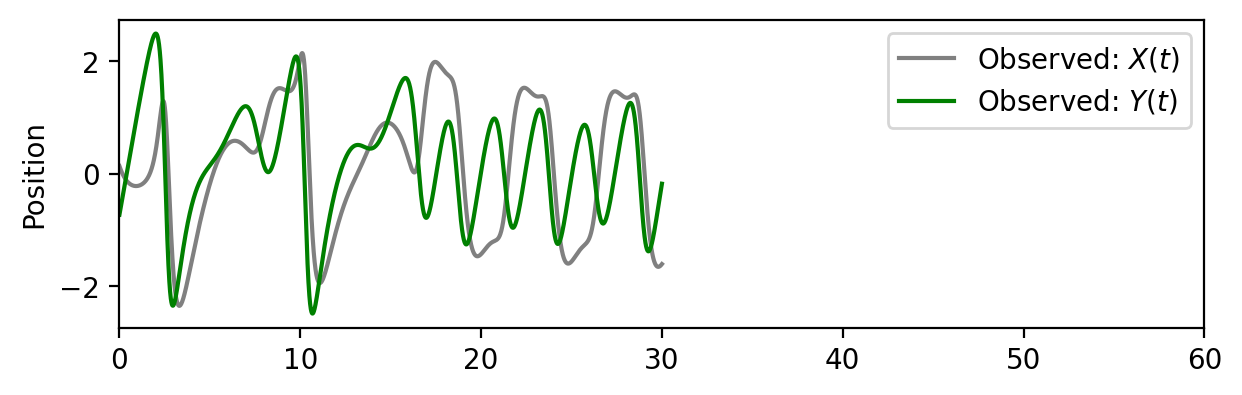

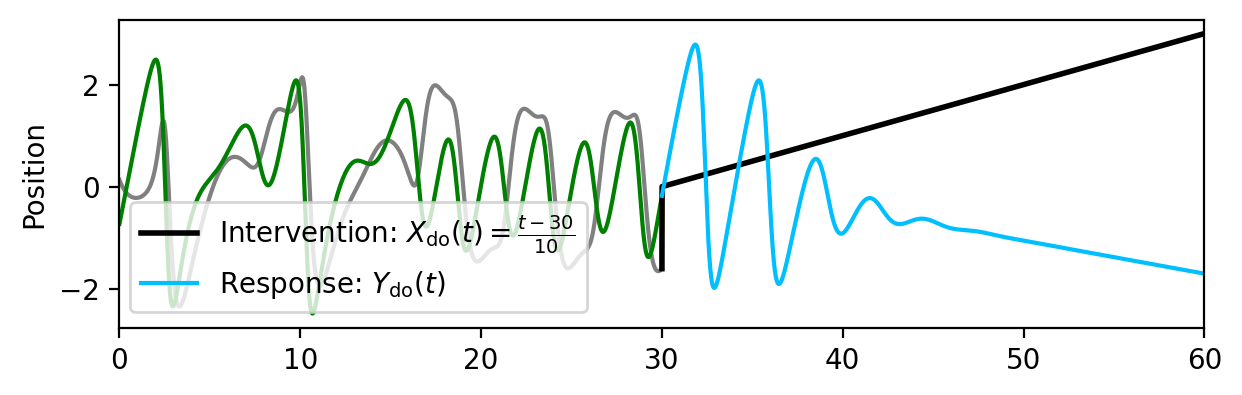

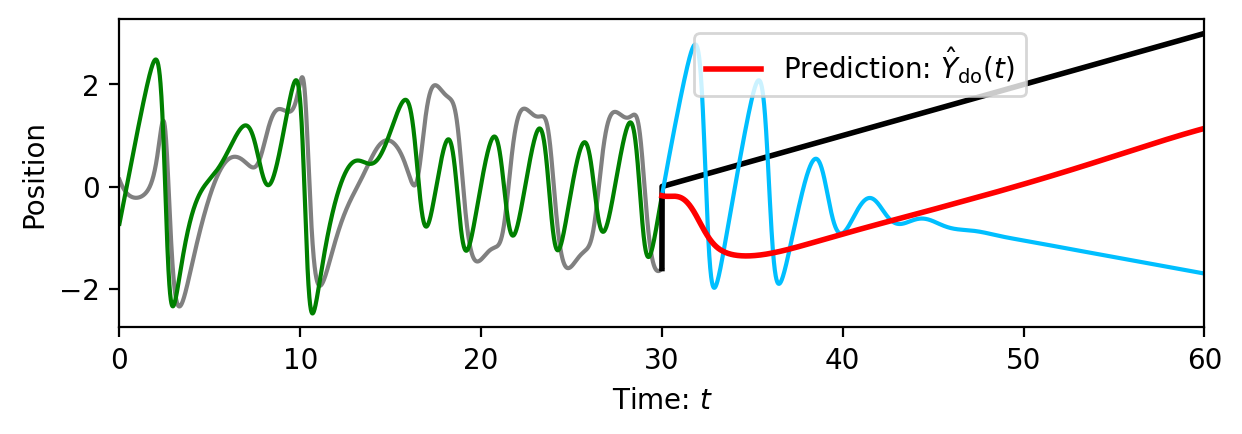

In [69]:
figsize = (7, 2)
x = X[:, inter_idx]
y = X[:, target_idx]

x_do = s(t_forecast)
y_do = X_do[:, target_idx]

y_do_pred = X_do_pred[:, target_idx]

x_color = "gray"
x_alpha = 1.0

y_color = "green"
y_alpha = 1.0

inter_color = "k"
inter_alpha = 1.0

y_true_color = "deepskyblue"
y_true_alpha = 1.0

y_pred_color = "red"
y_pred_alpha = 1.0

# Dynamics figure

plt.figure(figsize=figsize)
plt.plot(t, x, label="Observed: $X(t)$", c=x_color, alpha=x_alpha)
plt.plot(t, y, label="Observed: $Y(t)$", c=y_color, alpha=y_alpha)
plt.xlim(0, 60)
plt.legend()
plt.ylabel("Position")

plt.show()

# Intervention figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color, alpha=x_alpha)
plt.plot(t, y, c=y_color, alpha=y_alpha)

x_do[0] = x[-1]
plt.plot(
    t_forecast, x_do, c=inter_color, alpha=inter_alpha, lw=2,
    label="Intervention: $X_{\\text{do}}(t) = \\frac{t - 30}{10} $"
)

plt.plot(
    t_forecast, y_do, label="Response: $Y_{\\text{do}}(t)$",c=y_true_color, alpha=y_true_alpha)

plt.xlim(0, 60)
plt.legend(loc=(0.01, 0.05))
plt.ylabel("Position")

plt.show()

# Prediction Figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color, alpha=x_alpha)
plt.plot(t, y, c=y_color, alpha=y_alpha)

x_do[0] = x[-1]
y_do[0] = y[-1]
plt.plot(t_forecast, x_do, c=inter_color, alpha=inter_alpha, lw=2)
plt.plot(t_forecast, y_do, c=y_true_color, alpha=y_true_alpha)

plt.plot(
    t_forecast[:y_do_pred.shape[0]],
    y_do_pred,
    label="Prediction: $\\hat{Y}_{\\text{do}}(t)$",
    c=y_pred_color,
    alpha=y_pred_alpha,
    lw=2
)
plt.ylabel("Position")
plt.xlim(0, 60)
plt.legend(loc=(0.53, 0.75))
plt.xlabel("Time: $t$")
plt.show()


## Stochastic

In [70]:
model = interfere.dynamics.Liping3DQuadFinance(
    sigma=0.25, measurement_noise_std=np.ones(3) * 0.15)

x0 = 3 * np.random.rand(3) - 1.5
X = model.simulate(x0, t)
x_end = X[-1, :]
X_do = model.simulate(x_end, t_forecast, g)

method = interfere.methods.SINDY()
X_noised = X + np.random.randn(*X.shape)
X_noised[-1, :] = X[-1, :]
X_do_pred = method.counterfactual_forecast(X, t, t_forecast, g)

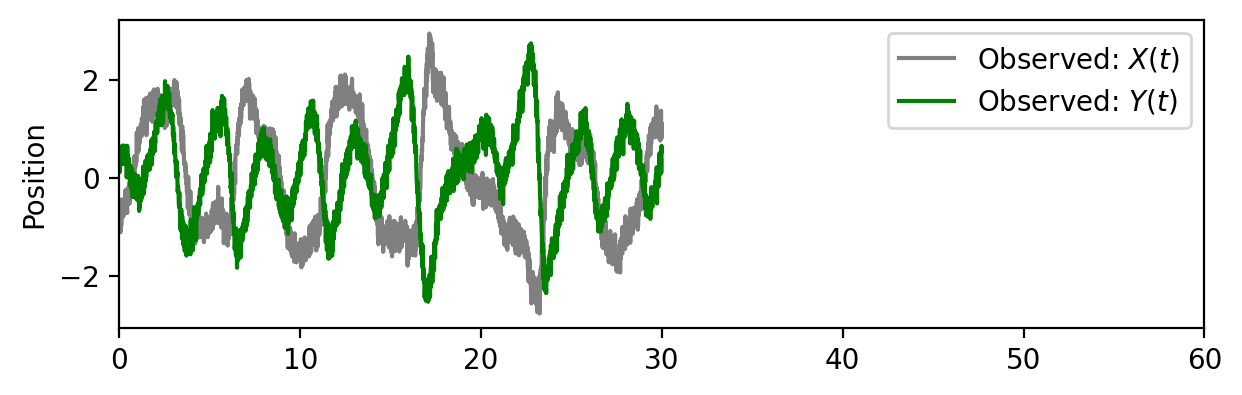

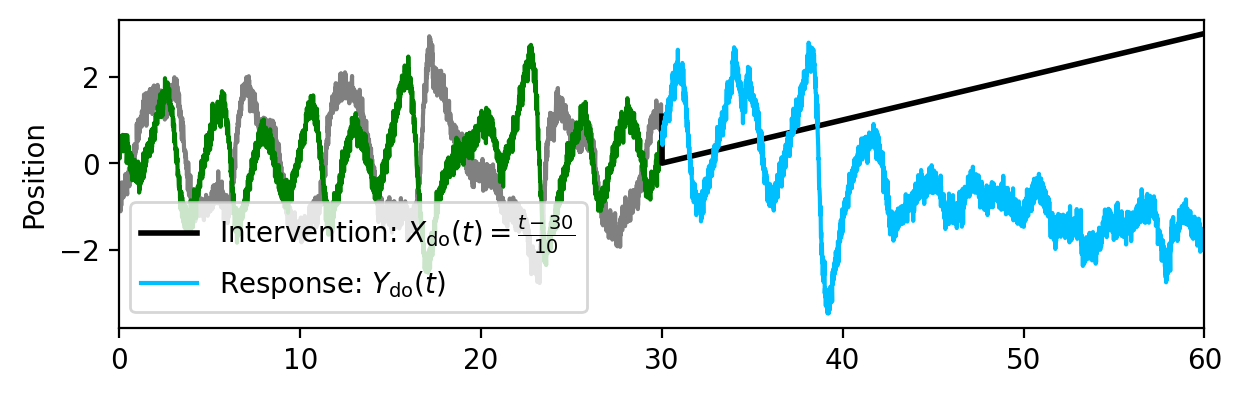

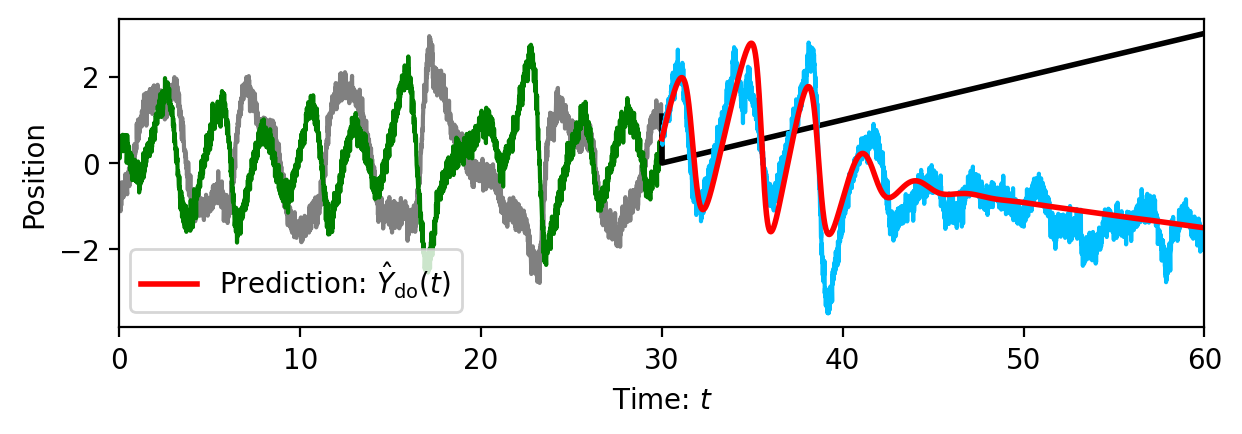

In [72]:
figsize = (7, 2)
x = X[:, inter_idx]
y = X[:, target_idx]

x_do = s(t_forecast)
y_do = X_do[:, target_idx]

y_do_pred = X_do_pred[:, target_idx]

x_color = "gray"
x_alpha = 1.0

y_color = "green"
y_alpha = 1.0

inter_color = "k"
inter_alpha = 1.0

y_true_color = "deepskyblue"
y_true_alpha = 1.0

y_pred_color = "red"
y_pred_alpha = 1.0

# Dynamics figure

plt.figure(figsize=figsize)
plt.plot(t, x, label="Observed: $X(t)$", c=x_color, alpha=x_alpha)
plt.plot(t, y, label="Observed: $Y(t)$", c=y_color, alpha=y_alpha)
plt.xlim(0, 60)
plt.legend()
plt.ylabel("Position")

plt.show()

# Intervention figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color, alpha=x_alpha)
plt.plot(t, y, c=y_color, alpha=y_alpha)

x_do[0] = x[-1]
plt.plot(
    t_forecast, x_do, c=inter_color, alpha=inter_alpha, lw=2,
    label="Intervention: $X_{\\text{do}}(t) = \\frac{t - 30}{10} $"
)

plt.plot(
    t_forecast, y_do, label="Response: $Y_{\\text{do}}(t)$",c=y_true_color, alpha=y_true_alpha)

plt.xlim(0, 60)
plt.legend(loc=(0.01, 0.05))
plt.ylabel("Position")

plt.show()

# Prediction Figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color, alpha=x_alpha)
plt.plot(t, y, c=y_color, alpha=y_alpha)

x_do[0] = x[-1]
y_do[0] = y[-1]
plt.plot(t_forecast, x_do, c=inter_color, alpha=inter_alpha, lw=2)
plt.plot(t_forecast, y_do, c=y_true_color, alpha=y_true_alpha)

plt.plot(
    t_forecast[:y_do_pred.shape[0]],
    y_do_pred,
    label="Prediction: $\\hat{Y}_{\\text{do}}(t)$",
    c=y_pred_color,
    alpha=y_pred_alpha,
    lw=2
)
plt.ylabel("Position")
plt.xlim(0, 60)
plt.legend(loc=(0.01, 0.05))
plt.xlabel("Time: $t$")
plt.show()
